In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import scipy
import string

In [5]:
# read in all_experiments_controlled_averaged.csv

ciber = pd.read_csv('all_experiments_controlled_averaged.csv', index_col=0)
ciber

,Tile,av_controlled_Ratio
0,AAACAAAGATCTCAACCATTGCAACCAATTATTATTGATGATATTA...,0.528282
1,AAACAAGGTAATAAGATGTTCTCTGGTAATTATACTTCTTATCATT...,1.701483
2,AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...,0.951084
3,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,0.471061
4,AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...,0.469274
...,...,...
2975,TTTGGTTCTGCTGACTTTGATACTACTGCTGGTGATCCATGGTTTC...,0.951469
2976,TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...,1.577512
2977,TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...,1.243842
2978,TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...,1.139413


In [6]:
# read in BYS4 data csv
facs = pd.read_csv('/global/scratch/projects/fc_mvslab/data/sequencing/bys4/BYS4_reseq_2023/data/results/activities_gcn4_deep.csv')
facs = facs.fillna(0)
facs['weighted_av'] = ((facs['Activity_A']*facs['reads_A'])+(facs['Activity_B']*facs['reads_B']))/(facs['reads_A']+facs['reads_B'])

facs

,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B,weighted_av
0,ATGTTTGAATCTCCAGAATCTGAAGATCCAAATAATTGGGTTTCTT...,151955.968121,162815.675433,69103.0,6064.0,152832.060890
1,CAACCATTGCCAGAATTGGTTCAACCAGTTCAACCAACTGTTCAAC...,15672.305975,13939.841534,41004.0,15586.0,15195.151164
2,AGAAGATCTTCTAATCAACATACTGGTTCTGCTTCTGTTTCTCCAT...,27223.152223,25011.743931,82603.0,6671.0,27057.904729
3,CAACCAAGATTGAGAGATTCTAGAACTCCAGTCTTGCCATCTGCTA...,30476.900053,27222.937684,52824.0,39802.0,29078.651071
4,AGACCAGCTCAATTGCCACAACCAAGAAGAGTTTCTGAAATTGTTC...,17560.312993,10785.582193,45144.0,18.0,17557.612821
...,...,...,...,...,...,...
19091,TCTCCAGGTTACTTCTCTCAAGATACTTCTCCAATGTTTGCTACTG...,0.000000,262143.000000,0.0,390.0,262143.000000
19092,TTCTCTTCTTCTAATGCATTTACTACTGAACAAATGAAGACATTTG...,0.000000,262143.000000,0.0,281.0,262143.000000
19093,ACTGGTAATGTTCCACAAACTCCAAATATGGCTATGCAAGGTAAAT...,0.000000,262143.000000,0.0,13.0,262143.000000
19094,CCAATGATTAATACTGAAATGGATTTGAATGCTGCTCCAGAAGAAT...,0.000000,262143.000000,0.0,34.0,262143.000000


In [7]:
intersection = pd.merge(ciber, facs,
                       left_on = 'Tile', right_on = 'ArrayDNA',
                       how= 'inner')
intersection

,Tile,av_controlled_Ratio,ArrayDNA,Activity_A,Activity_B,reads_A,reads_B,weighted_av
0,AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...,0.951084,AAACAATTGCAAACTAATTCTAATATGTCTGATGATACATTTGCTG...,152398.367022,104043.401351,34.0,3700.0,104483.698307
1,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,0.471061,AAACAATTGCCATTGTCTCCTAAAGTTAAGAGATCTCAATCTGAAG...,35367.628325,31502.323991,59431.0,59585.0,33432.475415
2,AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...,0.469274,AAACAATTTCATCAGAAAGTTGTTGCTGATACTACTACTACTACTA...,0.000000,68876.009980,0.0,1714.0,68876.009980
3,AAACATGCTTCTCCAGCTGTTCAGAATCAAAGAGTTGCTCAAATCT...,0.371628,AAACATGCTTCTCCAGCTGTTCAGAATCAAAGAGTTGCTCAAATCT...,13790.228539,19305.799535,2519.0,21588.0,18729.463892
4,AAACCAAGGAAGAGATCTAAAGTTGATCATTTGGGTTGTGTTACTT...,3.586546,AAACCAAGGAAGAGATCTAAAGTTGATCATTTGGGTTGTGTTACTT...,49937.377382,0.000000,6269.0,0.0,49937.377382
...,...,...,...,...,...,...,...,...
2771,TTTGGTTCTGCTCCACCATCTACTGCTTTGACTAATTTGACTTCTC...,25.739715,TTTGGTTCTGCTCCACCATCTACTGCTTTGACTAATTTGACTTCTC...,69874.299686,0.000000,3796.0,0.0,69874.299686
2772,TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...,1.577512,TTTGGTTCTTCTGGTGAATATGATGTTGCTGGTTCTCAATGGTTCT...,0.000000,77077.451962,0.0,15169.0,77077.451962
2773,TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...,1.243842,TTTGTCTTGTATGATCAACCAGCTTTGCCAAGAAGATCTCCATCTG...,0.000000,18186.396272,0.0,2916.0,18186.396272
2774,TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...,1.139413,TTTGTCTTGTTTGATTCTCCACAACCAACTAGAACTACTGTTAATA...,47164.619429,22409.867594,12367.0,664.0,45903.230800


In [8]:
# % ciber loss
100 - (intersection.shape[0] / ciber.shape[0] *100)

6.845637583892611

In [17]:
# % facs loss
100 - (intersection.shape[0] / facs.shape[0] *100)

85.46292417260159

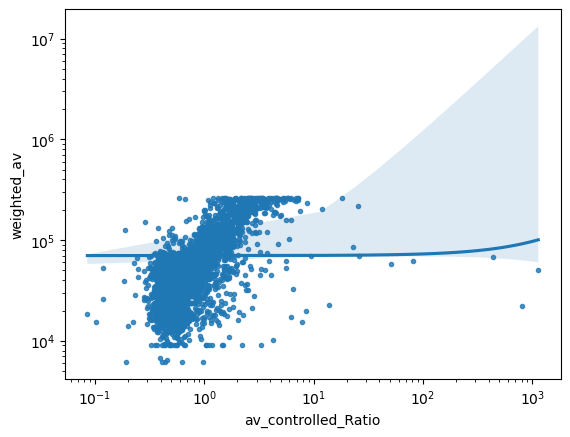

In [8]:
p = sns.regplot(intersection, x='av_controlled_Ratio', y='weighted_av', marker='.')
p.set(xscale="log", yscale="log")
plt.show()

In [ ]:
# percentiles of facs and ciber

In [12]:
ciber.describe()

,av_controlled_Ratio
count,2980.000000
mean,1.894271
std,26.758584
min,0.012390
25%,0.494723
50%,0.682096
75%,1.187565
max,1135.571877


In [13]:
facs.describe()

,Activity_A,Activity_B,reads_A,reads_B,weighted_av
count,19096.000000,19096.000000,1.909600e+04,19096.000000,19096.000000
mean,59598.949318,48923.099577,2.320812e+04,16015.222874,67481.617282
std,64836.964379,60999.344913,1.190327e+05,31886.285524,63033.339016
min,0.000000,0.000000,0.000000e+00,0.000000,6138.000000
25%,18104.653232,12109.378526,6.307500e+02,158.750000,24857.039810
50%,38829.589382,26712.533318,7.911500e+03,5414.500000,44809.274042
75%,74885.464355,59433.373743,2.274300e+04,19267.250000,78450.681376
max,262143.000000,262143.000000,9.039530e+06,920728.000000,262143.000000


In [ ]:
# compare 75 percentile

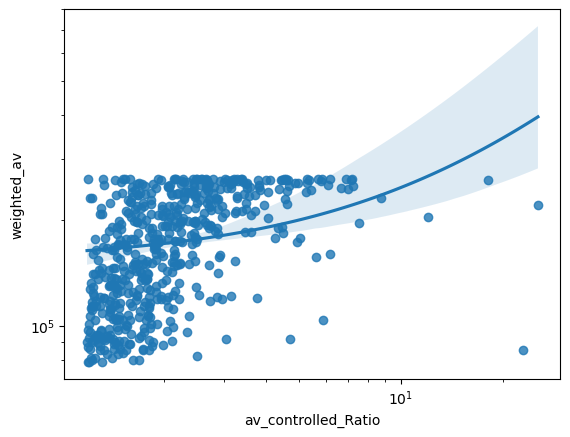

In [15]:
ciber75 = ciber[ciber['av_controlled_Ratio']>=1.187565]
facs75 = facs[facs['weighted_av']>=78450.681376]
int75 = pd.merge(ciber75, facs75, left_on='Tile', right_on='ArrayDNA')

p = sns.regplot(int75, x='av_controlled_Ratio', y='weighted_av')
p.set(xscale="log", yscale="log")
plt.show()

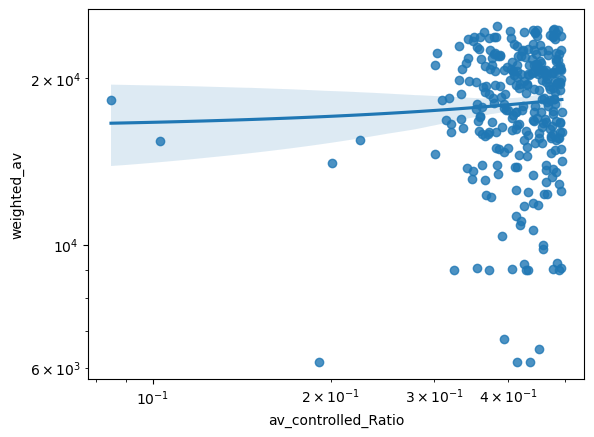

In [16]:
# compare 25th percentile
ciber25 = ciber[ciber['av_controlled_Ratio']<=0.494723]
facs25 = facs[facs['weighted_av'] <= 24857.039810]
int25 = pd.merge(ciber25, facs25, left_on='Tile', right_on='ArrayDNA')

p = sns.regplot(int25, x='av_controlled_Ratio', y='weighted_av')
p.set(xscale="log", yscale="log")
plt.show()

In [3]:
# old code


# #find average ratios per tile-bc 
# ciber_groups = ciber.groupby(['Tile', 'index_x'])
# ciber_groups_avratio = ciber_groups['Ratio'].mean().reset_index()
# ciber_groups_avratio

# test_ciber_groups = ciber_groups_avratio.groupby('Tile')['index_x'].count().reset_index()
# test_ciber_groups[test_ciber_groups['index_x']>1]

# ciber_groups_avratio[ciber_groups_avratio['Tile'] == 'AAACCAGTCTTGAAAGTTGAAACTGCTCCAAGATCTCCATTGAAGAGACCAGCTTCTTCTATGGCTTCTTCTCCAATTCCAGCTACTGGTGGTGTTAAACATTCTTCTATTTCTGGTGTT']

# need a for loop? that checks for the difference between tile activity ratios
